C:\Users\hendr\anaconda3\envs\Studium\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


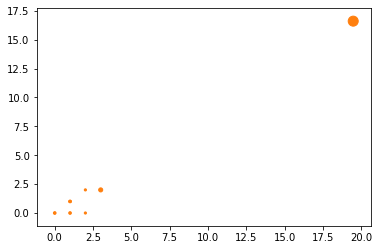

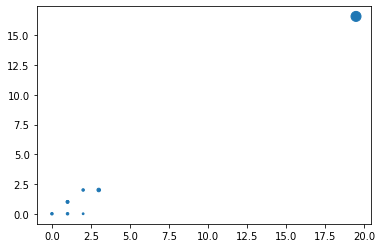

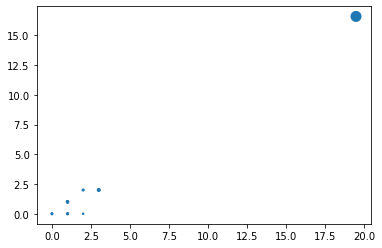

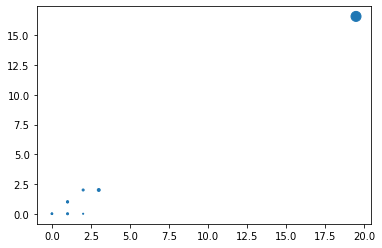

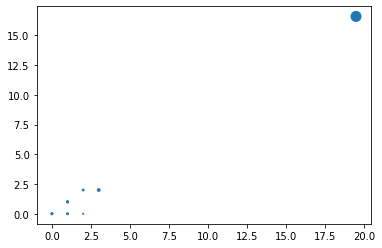

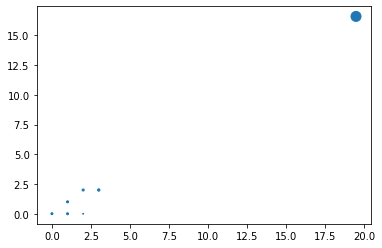

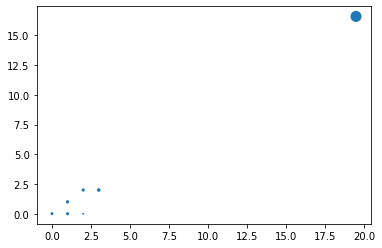

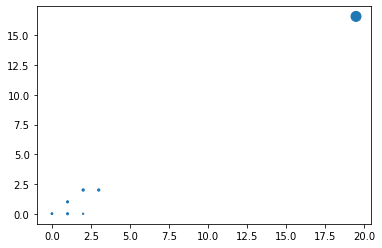

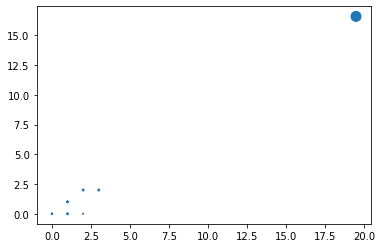

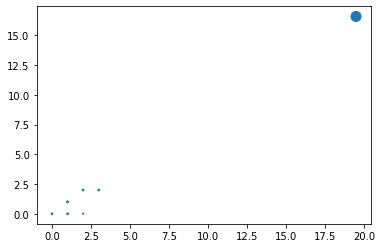

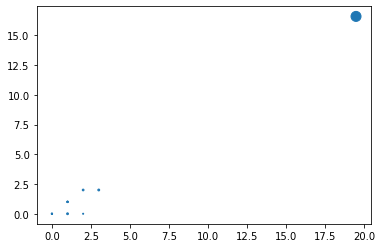

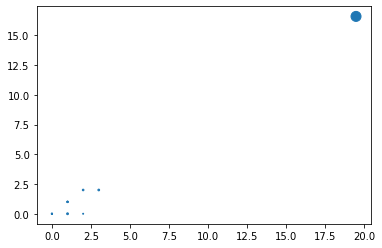

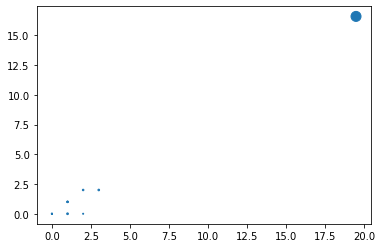

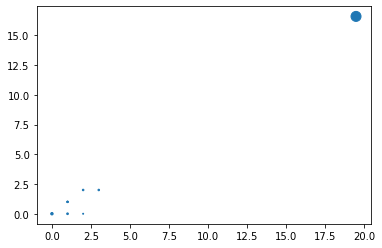

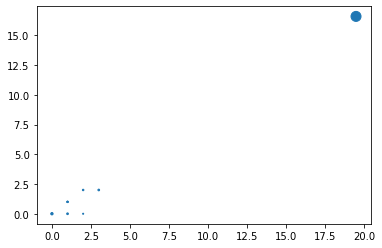

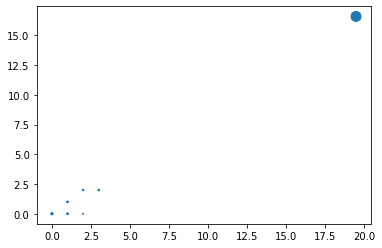

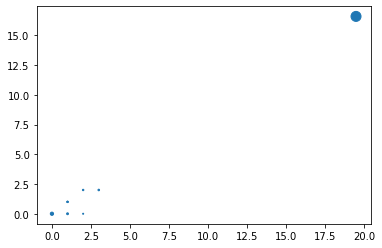

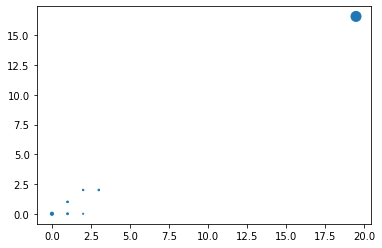

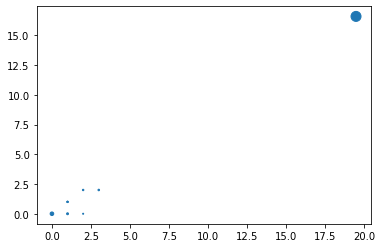

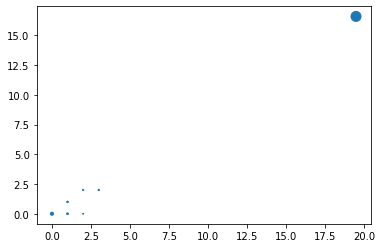

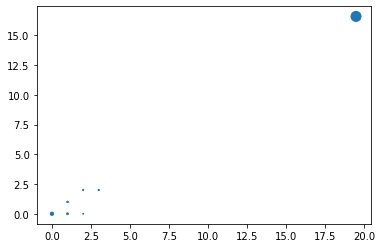

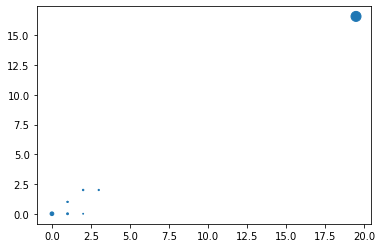

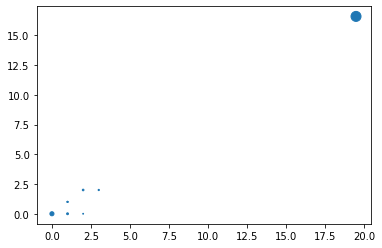

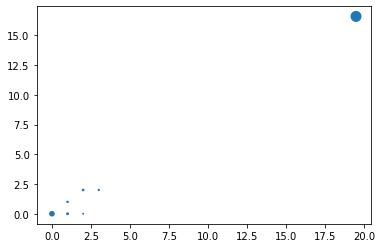

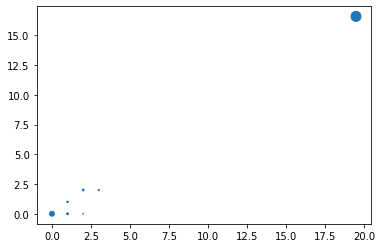

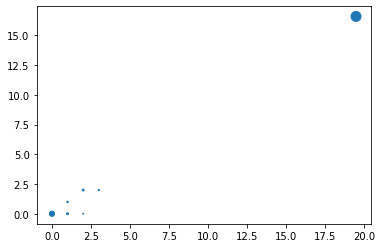

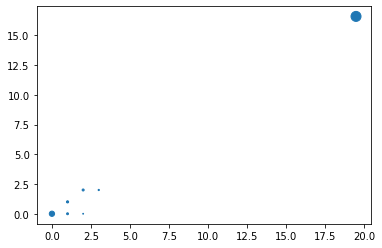

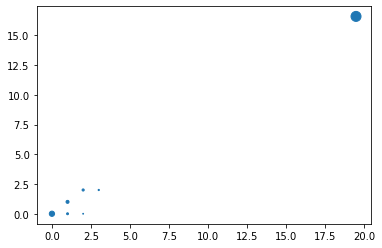

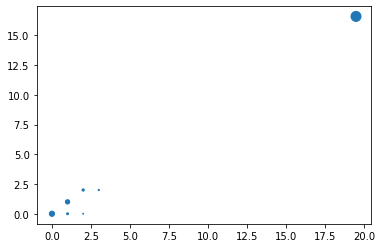

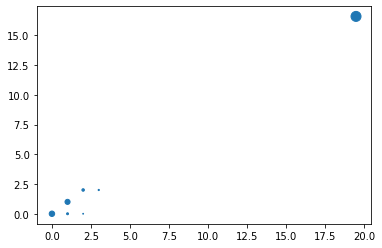

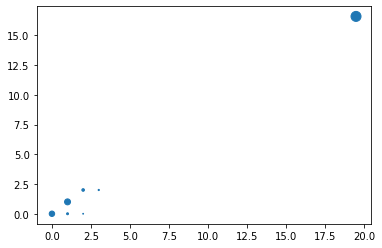

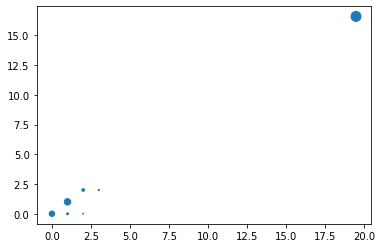

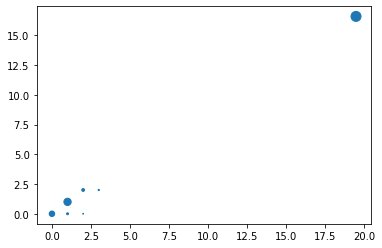

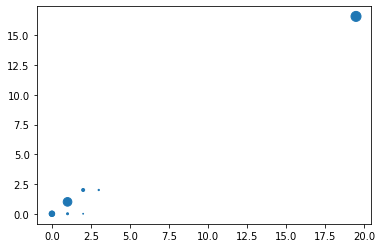

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
URL_CORONA_INFECTED = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/" + \
                      "csse_covid_19_data/csse_covid_19_time_series/" + \
                      "time_series_covid19_confirmed_global.csv"
def verlauf():
        
        #17-5-20: Funktioniert noch nicht wie gewünscht: Plot wird nicht aktualisiert
        
        #Längen- und Breitengrad auf gerade Werte bringen
        inf = pd.read_csv(URL_CORONA_INFECTED)
        #inf["Lat"] = inf["Lat"] - min(inf["Lat"])
        #inf["Long"] = inf["Long"] - min(inf["Long"])
        #nach Ländern gruppiert und die Breiten- und Längengerade gemittelt
        inf = inf.groupby(["Country/Region"]).mean()
        col = inf.columns.values
        #1. Initialisierung:
        plt.ion()
        fig, ax = plt.subplots()
        x = inf[col[3]]
        y = inf[col[2]]
        maxWert = max(inf[col[4]])
        minWert = min(inf[col[4]])
        inf[col[4]] = (inf[col[4]] - minWert) / (maxWert - minWert)
        sc = ax.scatter(x,y, s=inf[col[4]])
        fig.show()
        for index in range(5,len(col)):
            maxWert = max(inf[col[index]])
            minWert = min(inf[col[index]])
            inf[col[index]] = (inf[col[index]] - minWert) / (maxWert - minWert)
            sc = plt.scatter(x,y)
            sc.set_sizes(inf[col[index]]*100)
            fig.canvas.draw_idle()
            plt.pause(0.1)

def main():
    verlauf()
    
if __name__ == "__main__":
    main()